## **Import Dependencies and Create Data Bunch**

In [0]:
from fastai.collab import *

In [2]:
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
ratings[:4]

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884


In [3]:
data = CollabDataBunch.from_df(ratings)
data

TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; ,userId 580; movieId 1196; 
y: FloatList
3.5,3.5,5.0,2.0,4.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 509; movieId 924; ,userId 574; movieId 597; ,userId 15; movieId 924; ,userId 232; movieId 539; ,userId 561; movieId 1265; 
y: FloatList
4.0,3.0,5.0,5.0,3.5
Path: .;

Test: None

# Model Training, Testing and Interpretation

In [0]:
learn = collab_learner(data, n_factors = 50, y_range = (0., 5.5))
  #We set the y_range a bit lower at the lower end and a bit higher at the higher end because we are using sigmoid at the output layer.

In [58]:
learn.fit_one_cycle(10, 3e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,2.037140,1.928209,00:00
1,1.730726,1.176004,00:00
2,0.963219,0.619391,00:00
3,0.719906,0.600096,00:00
4,0.631857,0.589802,00:00
5,0.575391,0.585335,00:00
6,0.526360,0.582070,00:00
7,0.499687,0.581054,00:00
8,0.484997,0.581258,00:00
9,0.474074,0.581406,00:00


In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


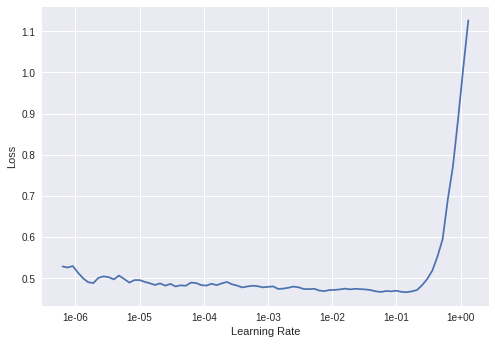

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(5, 1e-03, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.463811,0.581452,00:00
1,0.467984,0.581725,00:00
2,0.462032,0.581183,00:00
3,0.441699,0.582508,00:00
4,0.423459,0.582426,00:00


# Prediction - Inference

In [63]:
learn.predict(ratings.iloc[0])  #Label = 4

(FloatItem 4.1304193, tensor(4.1304), tensor(4.1304))

In [67]:
learn.predict(ratings.iloc[1]) #Label = 3.5

(FloatItem 3.6894805, tensor(3.6895), tensor(3.6895))

In [0]:
#It's working good enough.